# Question 2

## Question 2a




In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd
x = read_csv("MOS Data.csv")
z = x.sample(n=10)
z_sample = x.sample(n=10)
x

,Material \nID,Elastic modulus \n(GPa),Yield strength \n(MPa),Density \n(kg/m3),Price (INR/m2 of sheet)
0,1,27,5,500,50
1,2,29,6,520,55
2,3,31,6,550,60
3,4,33,7,400,65
4,5,35,7,650,70
5,6,37,8,660,75
6,7,39,8,670,80
7,8,41,9,680,85
8,9,43,9,690,90
9,10,45,10,686,95


## Class

In [2]:
class Bending_Distribution:
    def __init__(self, Data):
        self.Data = Data
    def modulus_ratio(self):
      n = list(self.Data.iloc[:,1])
      f = n[0]
      self.x = []
      for i in n:
          self.x.append(i/f)
      self.Data["Modulus Ratio (N)"] = self.x
    def Neutral_Axis(self):
      self.h = [0.04]*10
      self.Data["Height(H)"] = self.h
      self.b = [0.2] * 10
      self.Data["Breadth"] = self.b

      self.eq = [i*0.2 for i in self.x]
      self.Data["Equivalent Breadth(B)"] = self.eq

      self.eqar = [i*0.04 for i in self.eq]
      self.Data["Equivalent Area"] = self.eqar

      self.y = [ 0.38 - 0.04*i for i in range(0,10,1)]
      self.Data["y"] = self.y

      yar = [ self.eqar[i] * self.y[i] for i in range(10)]
      sum_yar = sum(yar)
      sum_ar = sum(self.eqar)
      self.yc = sum_yar/sum_ar
      return self.yc
    def Total_Weight(self):
      length = [20] * 10
      self.Data["Length"] = length

      volume = [self.h[i] * self.b[i] * length[i] for i in range(10)]
      density = list(self.Data.iloc[:,3])
      weight = [density[i] * volume[i] * 9.81 for i in range(10)]
      self.Data["Weight"] = weight
      self.total_weight = sum(weight)
      return self.total_weight
    def momemt_of_inertia(self):
      self.yi = [i-self.yc for i in self.y]
      self.Data["yi"] = self.yi
      self.I = [self.eq[i]*pow(0.04,3)/12 + self.eqar[i]*pow(self.yi[i],2) for i in range(10)]
      self.Data["I"] = self.I
    def Bending_Moment(self):
      P = 20000
      self.BM = (self.total_weight*20/8) + (P*20/4)
      return self.BM
    def stress(self):
      self.ycr1 = [(self.y[i]-0.02)-self.yc for i in range(10)] # Lower Layer
      self.ycr2 = [(self.y[i]+0.02)-self.yc for i in range(10)] # Upper Layer
      self.ycrm = [self.yi[i] for i in range(10)] # Upper Layer
      self.Data["Ycr1"] = self.ycr1
      self.Data["Ycr2"] = self.ycr2
      self.Data["Ycr_Middle_Layer"] = self.ycrm
      self.sigmacr1 = [self.BM * self.ycr1[i] / sum(self.I) for i in range(10)]
      self.Data["sigmacr1"] = self.sigmacr1
      self.sigmacr2 = [self.BM * self.ycr2[i] / sum(self.I) for i in range(10)]
      self.Data["sigmacr2"] = self.sigmacr2
      self.sigma_middle = [self.BM * self.ycrm[i] / sum(self.I) for i in range(10)]
      self.Data["sigma_middle"] = self.sigma_middle
      self.n_equivalent_lower = [self.sigmacr1[i]*self.x[i] for i in range(10)]
      self.Data["Lower_Layer_Equivalent_Stress \n(MPa)"] = self.n_equivalent_lower

      self.n_equivalent_upper = [self.sigmacr2[i]*self.x[i] for i in range(10)]
      self.Data["Upper_Layer_Equivalent_Stress \n(MPa)"] = self.n_equivalent_upper

      self.n_equivalent_middle = [self.sigma_middle[i]*self.x[i] for i in range(10)]
      self.Data["Middle_Layer_Equivalent_Stress \n(MPa)"] = self.n_equivalent_middle
      y_ = list(self.Data.iloc[:,2])
      y1 = [i*(pow(10,6)) for i in y_]
      self.ratio_lower = [self.n_equivalent_lower[i]/y1[i] for i in range(10)]
      self.Data["Ratio_lower"] = self.ratio_lower
      self.ratio_upper = [self.n_equivalent_upper[i]/y1[i] for i in range(10)]
      self.Data["Ratio2_upper"] = self.ratio_upper
      self.ratio_middle = [self.n_equivalent_middle[i]/y1[i] for i in range(10)]
      self.Data["Ratio2_middle"] = self.ratio_middle
    def Plot_Graph(self):
      import matplotlib.pyplot as plt
      # Plot 1
      y_ = list(self.Data.iloc[:,2])
      y11 = [i*(pow(10,6)) for i in y_]
      y12 = [abs(i) for i in self.n_equivalent_lower]
      y13 = [abs(i) for i in self.n_equivalent_upper]
      x = range(1, len(y11) + 1)

      fig, ax = plt.subplots(1, 2, figsize=(12, 6))

      ax[0].plot(x, y11, 'b-', label='Yield strength', marker='o')
      ax[0].plot(x, y12, 'r-.', label='Lower_Layer_Stress', marker='o')
      ax[0].plot(x, y13, 'g-.', label='Upper_Layer_Stress', marker='d')
      ax[0].legend()
      ax[0].set_xlabel('Index')
      ax[0].set_ylabel('Stress')
      ax[0].set_title('Comparison of Yield strength and Stress')
      ax[0].grid(True)

      # Plot 2
      y21 = [(i) for i in self.ratio_lower]
      y22 = [(i) for i in self.ratio_upper]
      x = range(1, len(y21) + 1)

      ax[1].plot(x, y21, 'b-', label='ratio_lower_Layer', marker='o')
      ax[1].plot(x, y22, 'g-', label='ratio_upper_Layer', marker='o')
      ax[1].axhline(y=1, linestyle='--', color='#FF5733')  # add horizontal line at y=1
      ax[1].axhline(y=-1, linestyle='--', color='#FF5733') # add horizontal line at y=-1
      ax[1].legend()
      ax[1].set_xlabel('Index')
      ax[1].set_ylabel('Ratio')
      ax[1].set_title('Ratio plot')
      ax[1].grid(True)

      # Plot 3

      y_ = list(self.Data.iloc[:,2])
      y31 = [i*(pow(10,6)) for i in y_]
      y32 = [abs(i) for i in self.n_equivalent_lower]
      x = range(1, len(y31) + 1)

      fig, ax = plt.subplots(1, 2, figsize=(10, 6))

      ax[0].plot(x, y31, 'b-', label='Yield strength', marker='o')
      ax[0].plot(x, y32, 'r-.', label='Middle_Layer_Stress', marker='o')
      ax[0].legend()
      ax[0].set_xlabel('Index')
      ax[0].set_ylabel('Stress')
      ax[0].set_title('Comparison of Yield strength and Stress')
      ax[0].grid(True)

      # Plot 4
      y41 = [(i) for i in self.ratio_middle]
      x = range(1, len(y41) + 1)

      ax[1].plot(x, y41, 'b-', label='ratio_middle_Layer', marker='o')
      ax[1].axhline(y=1, linestyle='--', color='#FF5733')  # add horizontal line at y=1
      ax[1].axhline(y=-1, linestyle='--', color='#FF5733') # add horizontal line at y=-1
      ax[1].legend()
      ax[1].set_xlabel('Index')
      ax[1].set_ylabel('Ratio')
      ax[1].set_title('Ratio plot')
      ax[1].grid(True)

      # Display plot
      plt.tight_layout()
      plt.show()
    def Condition(self):
      for i in self.ratio_middle:
        if i<-1 or i>1:
          return 0
      return 1
    def train(self,z,D):
      D.modulus_ratio()
      YC = D.Neutral_Axis()
      
      TW = D.Total_Weight()
      D.momemt_of_inertia()
      M = D.Bending_Moment()
      D.stress()
      print("NEUTRAL Axis : yc = ",YC,'\n',"Weight of Beam :",TW,'\n',"Moment :",self.BM,'\n',"Inertia :", sum(self.I))
      D.Plot_Graph()
      return self.Data
    def check(self,z,D):
      D.modulus_ratio()
      D.Neutral_Axis()
      D.Total_Weight()
      D.momemt_of_inertia()
      D.Bending_Moment()
      D.stress()
      x = D.Condition()
      if x == 1:
        s = list(self.Data.iloc[:,4])
        for i in range(10):
            m+= m[i]
        if m < min_price:
          min_price = m
          return self.Data
      else:
        return z_sample

## Class Execution

NEUTRAL Axis : yc =  0.1992241379310345 
 Weight of Beam : 9425.448 
 Moment : 123563.62 
 Inertia : 0.001191546124373711


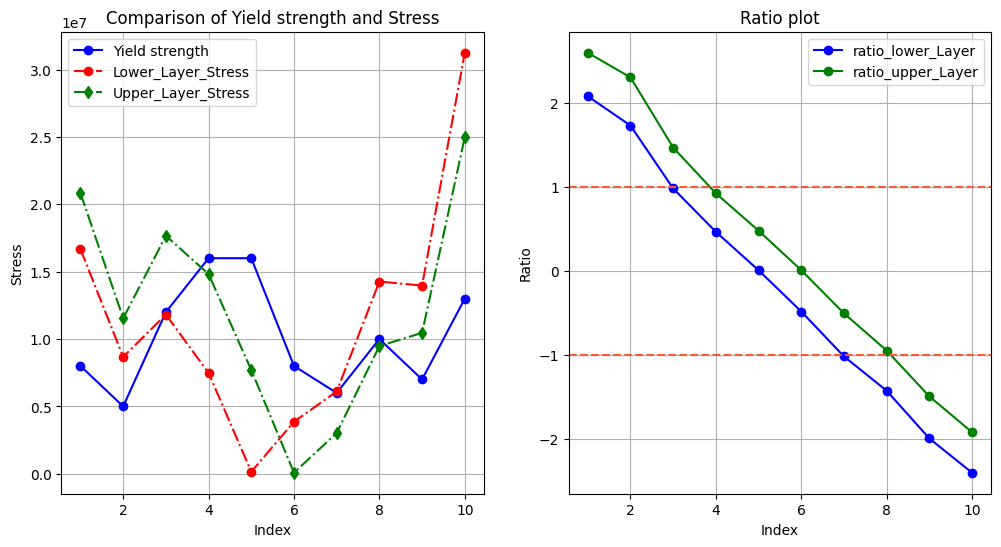

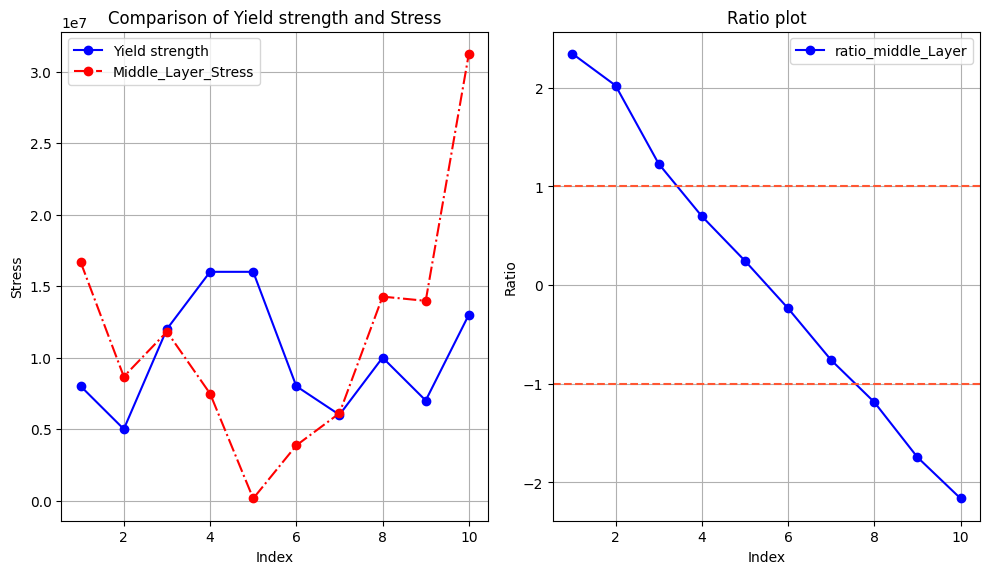

,Material \nID,Elastic modulus \n(GPa),Yield strength \n(MPa),Density \n(kg/m3),Price (INR/m2 of sheet),Modulus Ratio (N),Height(H),Breadth,Equivalent Breadth(B),Equivalent Area,...,Ycr_Middle_Layer,sigmacr1,sigmacr2,sigma_middle,Lower_Layer_Equivalent_Stress \n(MPa),Upper_Layer_Equivalent_Stress \n(MPa),Middle_Layer_Equivalent_Stress \n(MPa),Ratio_lower,Ratio2_upper,Ratio2_middle
6,7,39,8,670,80,1.000000,0.04,0.2,0.200000,0.008000,...,0.180776,1.667250e+07,2.082051e+07,1.874650e+07,1.667250e+07,2.082051e+07,1.874650e+07,2.084062,2.602563,2.343313
0,1,27,5,500,50,0.692308,0.04,0.2,0.138462,0.005538,...,0.140776,1.252449e+07,1.667250e+07,1.459849e+07,8.670798e+06,1.154250e+07,1.010665e+07,1.734160,2.308499,2.021329
14,15,55,12,666,120,1.410256,0.04,0.2,0.282051,0.011282,...,0.100776,8.376476e+06,1.252449e+07,1.045048e+07,1.181298e+07,1.766274e+07,1.473786e+07,0.984415,1.471895,1.228155
21,22,69,16,626,155,1.769231,0.04,0.2,0.353846,0.014154,...,0.060776,4.228467e+06,8.376476e+06,6.302472e+06,7.481133e+06,1.481992e+07,1.115053e+07,0.467571,0.926245,0.696908
22,23,71,16,619,160,1.820513,0.04,0.2,0.364103,0.014564,...,0.020776,8.045708e+04,4.228467e+06,2.154462e+06,1.464732e+05,7.697978e+06,3.922226e+06,0.009155,0.481124,0.245139
5,6,37,8,660,75,0.948718,0.04,0.2,0.189744,0.007590,...,-0.019224,-4.067553e+06,8.045708e+04,-1.993548e+06,-3.858960e+06,7.633108e+04,-1.891315e+06,-0.482370,0.009541,-0.236414
1,2,29,6,520,55,0.743590,0.04,0.2,0.148718,0.005949,...,-0.059224,-8.215562e+06,-4.067553e+06,-6.141557e+06,-6.109008e+06,-3.024590e+06,-4.566799e+06,-1.018168,-0.504098,-0.761133
9,10,45,10,686,95,1.153846,0.04,0.2,0.230769,0.009231,...,-0.099224,-1.236357e+07,-8.215562e+06,-1.028957e+07,-1.426566e+07,-9.479495e+06,-1.187258e+07,-1.426566,-0.947949,-1.187258
3,4,33,7,400,65,0.846154,0.04,0.2,0.169231,0.006769,...,-0.139224,-1.651158e+07,-1.236357e+07,-1.443758e+07,-1.397134e+07,-1.046148e+07,-1.221641e+07,-1.995905,-1.494498,-1.745202
16,17,59,13,658,130,1.512821,0.04,0.2,0.302564,0.012103,...,-0.179224,-2.065959e+07,-1.651158e+07,-1.858559e+07,-3.125425e+07,-2.497906e+07,-2.811666e+07,-2.404173,-1.921466,-2.162820


In [3]:
D = Bending_Distribution(z)
z_sample = D.train(z,D)
z_sample

# Question 2b

In [15]:
df = pd.read_csv('MOS Data.csv')
df.columns = df.columns.str.strip()
df_sorted = df.sort_values(by='Price (INR/m2  of sheet)')
df_subset = pd.concat([
    df.iloc[8:9],
df.iloc[9:10],
df.iloc[15:16],
df.iloc[7:8],
df.iloc[6:7],
df.iloc[14:15],
df.iloc[10:11],
df.iloc[13:14],
df.iloc[11:12],
df.iloc[12:13]
    ])
df_subset

,Material \nID,Elastic modulus \n(GPa),Yield strength \n(MPa),Density \n(kg/m3),Price (INR/m2 of sheet)
8,9,43,9,690,90
9,10,45,10,686,95
15,16,57,13,662,125
7,8,41,9,680,85
6,7,39,8,670,80
14,15,55,12,666,120
10,11,47,10,682,100
13,14,53,12,670,115
11,12,49,11,678,105
12,13,51,11,674,110


NEUTRAL Axis : yc =  0.19525 
 Weight of Beam : 10607.356800000001 
 Moment : 126518.392 
 Inertia : 0.0011898734883720933


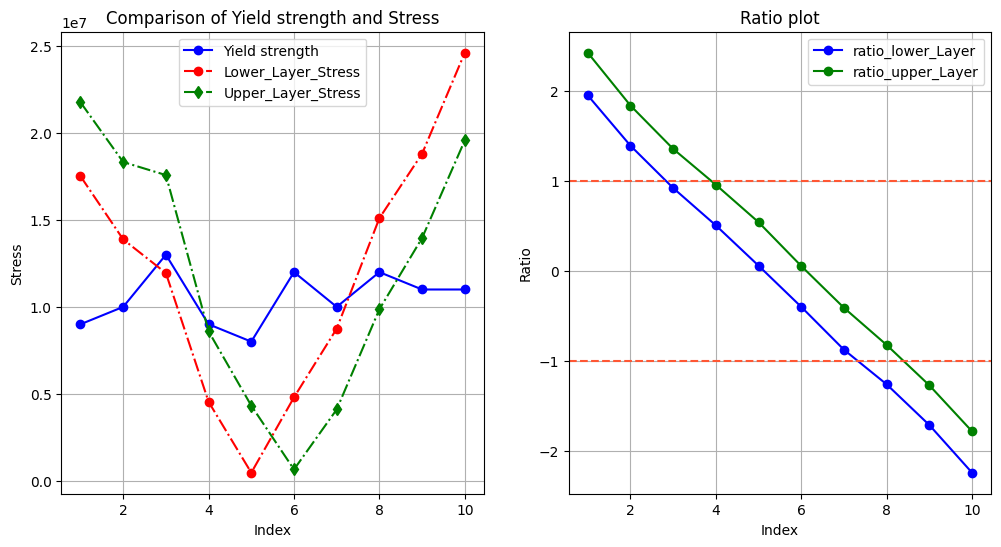

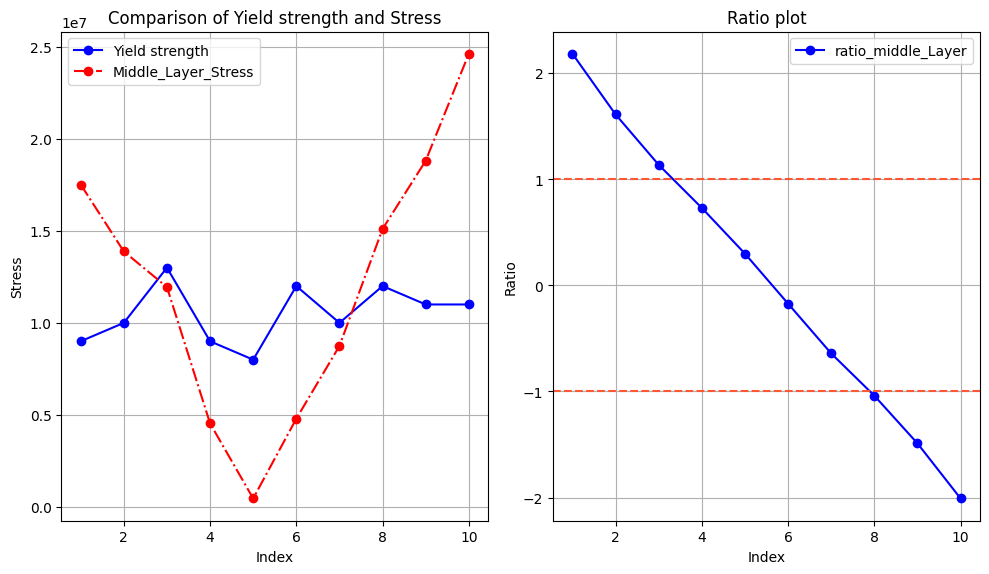

In [16]:
D = Bending_Distribution(df_subset)
z_sample = D.train(df_subset,D)
